Average Firing Rate: 50.00 spikes/sec


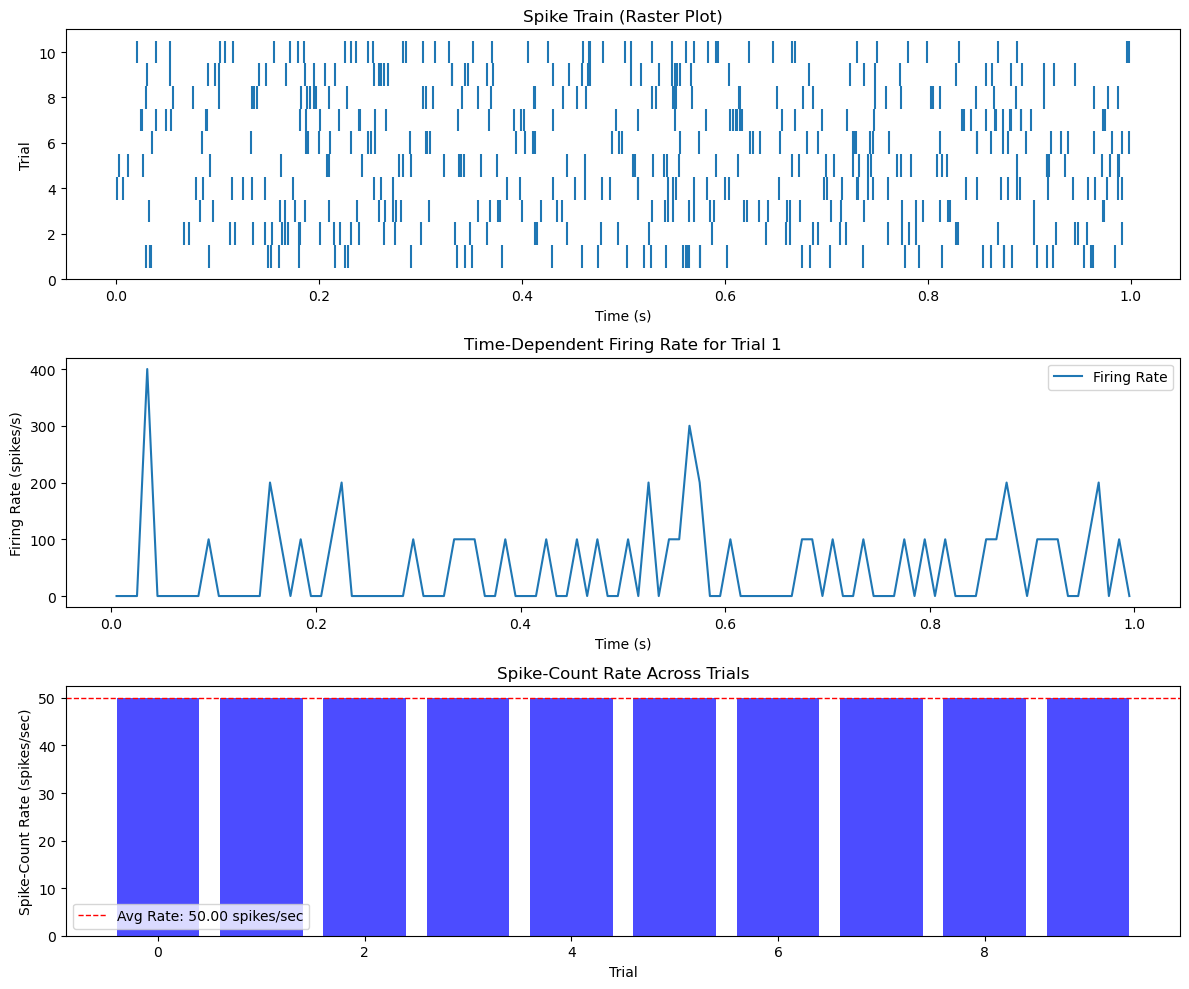

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic spike train data
def generate_spike_train(num_spikes, T):
    """
    Generates a spike train for a single trial.
    
    Parameters:
    num_spikes (int): Number of spikes in the train.
    T (float): Total time duration of the trial.
    
    Returns:
    np.array: Array of spike times.
    """
    # Generate random spike times uniformly distributed between 0 and T
    spike_times = np.sort(np.random.uniform(0, T, num_spikes))
    return spike_times

# Function to compute the spike-count rate
def spike_count_rate(spike_times, T):
    """
    Computes the spike-count rate for a single trial.
    
    Parameters:
    spike_times (np.array): Array of spike times.
    T (float): Total time duration of the trial.
    
    Returns:
    float: Spike-count rate (spikes per second).
    """
    # Number of spikes divided by the total time gives the spike-count rate
    n = len(spike_times)
    r = n / T
    return r

# Function to compute the time-dependent firing rate using a time binning approach
def firing_rate(spike_times, T, dt):
    """
    Computes the time-dependent firing rate.
    
    Parameters:
    spike_times (np.array): Array of spike times.
    T (float): Total time duration of the trial.
    dt (float): Width of the time bin.
    
    Returns:
    np.array: Array of firing rates at each time bin.
    np.array: Array of time bin centers.
    """
    # Generate an array of time bins
    time_bins = np.arange(0, T + dt, dt)
    # Histogram spike times into the time bins
    spike_counts, _ = np.histogram(spike_times, bins=time_bins)
    # Calculate the firing rate as spike count divided by time bin width
    firing_rates = spike_counts / dt
    # Calculate time bin centers for plotting
    time_bin_centers = time_bins[:-1] + dt / 2
    return firing_rates, time_bin_centers

# Function to compute the average firing rate over multiple trials
def average_firing_rate(spike_times_list, T):
    """
    Computes the average firing rate over multiple trials.
    
    Parameters:
    spike_times_list (list of np.array): List of spike time arrays for each trial.
    T (float): Total time duration of the trial.
    
    Returns:
    float: Average firing rate (spikes per second).
    """
    # Average number of spikes across all trials divided by the trial duration
    avg_spike_count = np.mean([len(spike_times) for spike_times in spike_times_list])
    avg_firing_rate = avg_spike_count / T
    return avg_firing_rate

# Main function to simulate and analyze spike trains
def main():
    # Parameters
    num_trials = 10  # Number of trials
    num_spikes_per_trial = 50  # Number of spikes per trial
    T = 1.0  # Duration of each trial in seconds
    dt = 0.01  # Time bin width in seconds

    # Generate spike trains for each trial
    spike_trains = [generate_spike_train(num_spikes_per_trial, T) for _ in range(num_trials)]

    # Compute spike-count rate for each trial
    spike_count_rates = [spike_count_rate(spike_train, T) for spike_train in spike_trains]

    # Compute time-dependent firing rate for each trial
    firing_rates_list = [firing_rate(spike_train, T, dt) for spike_train in spike_trains]

    # Compute average firing rate across trials
    avg_firing_rate = average_firing_rate(spike_trains, T)
    print(f"Average Firing Rate: {avg_firing_rate:.2f} spikes/sec")

    # Plot the firing rate of the first trial as an example
    firing_rates, time_bin_centers = firing_rates_list[0]
    plt.figure(figsize=(12, 10))

    # Plot the spike train (Raster plot)
    plt.subplot(3, 1, 1)
    for i, spike_train in enumerate(spike_trains):
        plt.vlines(spike_train, i + 0.5, i + 1.5)
    plt.title('Spike Train (Raster Plot)')
    plt.xlabel('Time (s)')
    plt.ylabel('Trial')

    # Plot the time-dependent firing rate for the first trial
    plt.subplot(3, 1, 2)
    plt.plot(time_bin_centers, firing_rates, label='Firing Rate')
    plt.xlabel('Time (s)')
    plt.ylabel('Firing Rate (spikes/s)')
    plt.title('Time-Dependent Firing Rate for Trial 1')
    plt.legend()

    # Plot the average firing rate for each trial
    plt.subplot(3, 1, 3)
    plt.bar(range(num_trials), spike_count_rates, color='blue', alpha=0.7)
    plt.axhline(avg_firing_rate, color='red', linestyle='dashed', linewidth=1, label=f'Avg Rate: {avg_firing_rate:.2f} spikes/sec')
    plt.xlabel('Trial')
    plt.ylabel('Spike-Count Rate (spikes/sec)')
    plt.title('Spike-Count Rate Across Trials')
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()
